# Project 2: Univariate Forecast of Los Angeles County Arrest Data

## COM SCI X 450.1: Intro to Data Science


### Jordan Campbell

## Overview of the Data

The dataset used in this project comes from Kaggle (url: https://www.kaggle.com/cityofLA/los-angeles-crime-arrest-data) (1) arrest data. The data is provided by the city of Los Angeles which is also available on the city's webpage (url: https://data.lacity.org/).

The dataset ranges from January 2010 to June 2019.

Arrest data contains 23 columns: (1) Report ID, (2) Arrest Date, (3) Time, (4) Area ID, (5) Area Name, (6) Reporting District, (7) Age, (8) Sex Code, (9) Descent Code, (10) Charge Group Code, (11) Charge Group Description, (12) Arrest Type Code, (13) Charge, (14) Charge Description, (15) Address, (16) Cross Street, (17) Location, (18) Zip Codes, (19) Census Tracts, (20) Precint Boundaries, (21) LA Specific Plans, (22) Council Districts, (23) Neighborhood Councils (Certified).

Additional columns are added to both datasets to indicate arrests ("Arrests").

## Time-Series Modifications

The arrest dataset was modified from the above file to fit into a time-series format. The majority of this was done in the previous project.


Much of the code from this project uses the following How-To link for ARIMA forecasting in Python.

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("timeseries_arrests.csv")

df.head()

,Unnamed: 0,ds,y
0,0,2010-01-01,160
1,1,2010-01-02,105
2,2,2010-01-03,85
3,3,2010-01-04,141
4,4,2010-01-05,142


In [4]:
df['ds'].min(), df['ds'].max()


('2010-01-01', '2019-06-22')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df = df.sort_values('ds')

df.isnull().sum()

ds    0
y     0
dtype: int64

In [6]:
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df.set_index('ds')

In [7]:
y = df['y']

### Turn the data into monthly

In [9]:
y = df['y'].resample('MS').mean()

### Plot

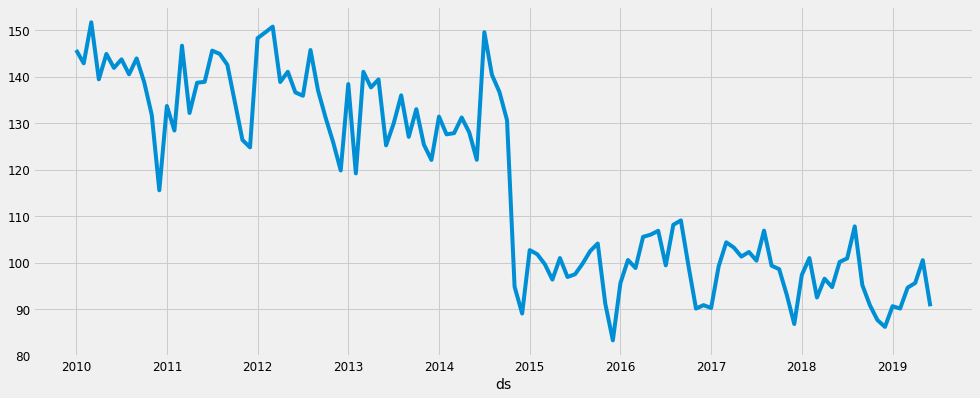

In [10]:
y.plot(figsize=(15, 6))

plt.show()

### Decompse using the statsmodel.api package tool

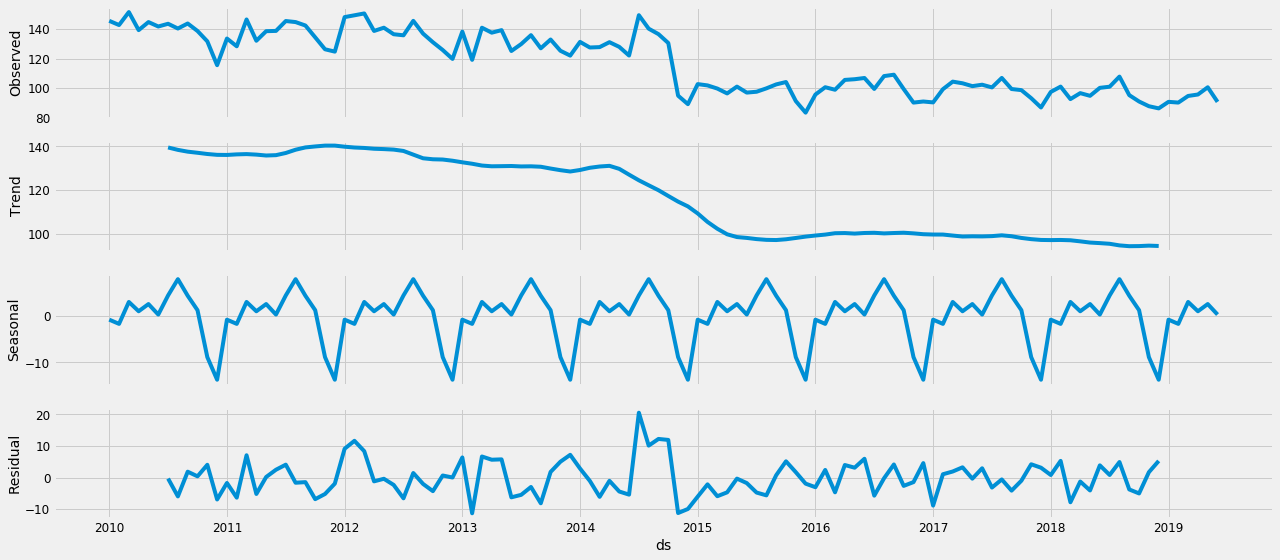

In [11]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Gives examples of the outputs for choosing the right seasonal ARIMA

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Outputs AIC values w/ different parameters.

In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1401.9827202379552
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1150.2751183308926
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:814.308849143364
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:725.8066619325355
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:801.8823945534544
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:760.6348264785481
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:733.0160648499309
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:723.692855570691
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1256.5891097951596
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1021.1143777825064
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:755.4893473928432
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:669.8043180835898
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:755.809470931244
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:746.5837665428581
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:683.2334801949316
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:666.7097140081328
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:807.6081404324134
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:711.3356021926926
ARIMA(0, 

### A lot of output, but the lowest AIC values is the following...

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:600.6499668404772


In [14]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4809      0.089     -5.417      0.000      -0.655      -0.307
ma.S.L12      -0.8375      0.208     -4.021      0.000      -1.246      -0.429
sigma2        49.9849      8.646      5.782      0.000      33.040      66.930


### The output above gives us the weights on the various terms via the coefficients. Additionally, it let's us know that they are statistically significant (p-values less than 0.05).

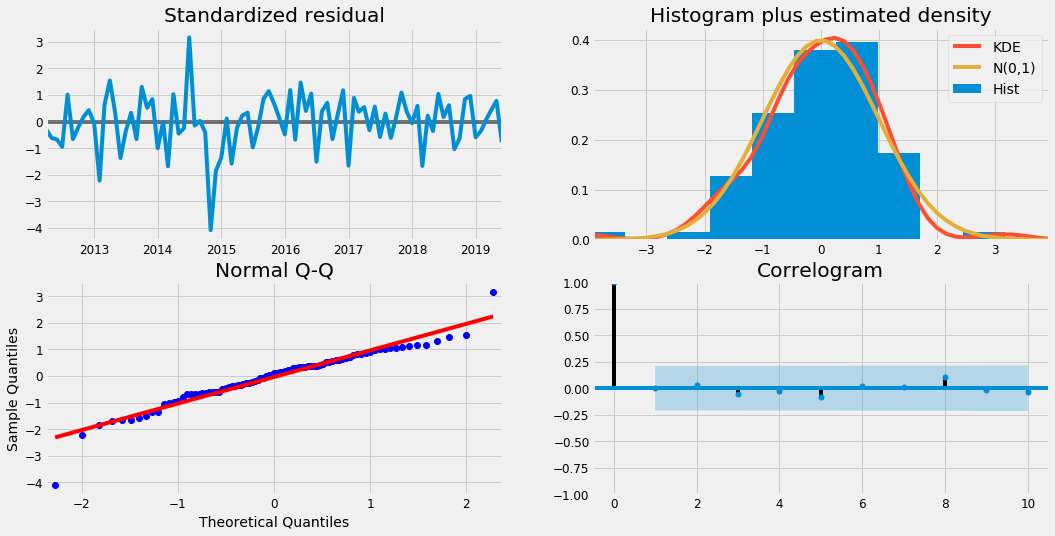

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### The outputs above show whether the ARIMA model violates the assumptions. We don't want the residuals to be correlated w/ mean zero and normally distributed.

### They appear to be normally distributed, but there does appear to be some autocorrelation among the residuals. However, looking at the correlogram there aren't too many large spikes.

## Out-of-Sample Forecast

### This allows us to test the accuracy of out forecast.

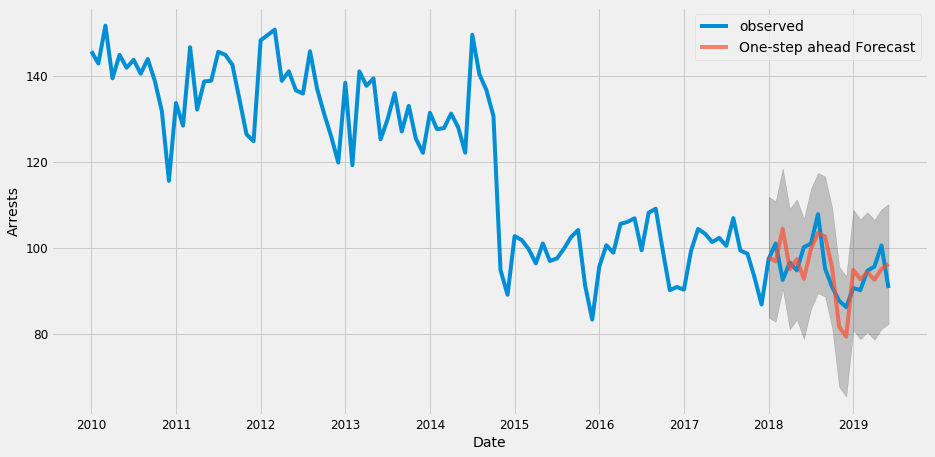

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Arrests')
plt.legend()

plt.show()

### Good enough for government work. Clearly there are some misses, but this small forecast does a good job of capturing the general pattern.

### We can quantify the accuracy with MAPE (mean absolute percentage error).

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]

# Compute the mean square error
mse = abs((y_truth - y_forecasted)/y_truth).mean()

print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Absolute Percentage Error of our forecasts is 0.05


### 5% is not too high. Let's forecast into future.

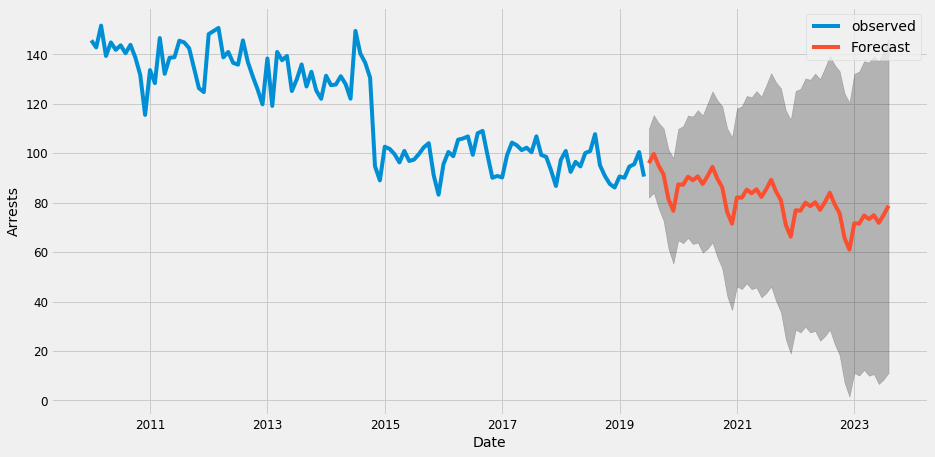

In [21]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Arrests')

plt.legend()
plt.show()

## Analysis

The seasonal component is apparent, but there is also clear general trend downward. It will be interesting to follow up and see if this is an accurate forecast. 

Particularly, for arrest/crime data univariate forecasts are much, much simpler then creating multivariate forecasts w/ x-values. There are endogeneity issues and crime is a complicated phenomena to model--there are lots of variables and interactions. Therefore, a univariate forecasts simplifies the task greatly.

From the econometric literature, over the short-term ARIMA performs fairly well compared to structural forecasts. Over the longer run, they tend to fall short. 

This was fairly simple to implement and could be useful for public policy. 

### Three main data insights

1. There are clear seasonal patterns picked up in arrest data.

2. Arrests are trending down in LA County.

3. Univariate forecasts are easy to implement, and at least for the period of time that was used to test the accuracy of this forecast, it performed well. Arrests is likely a good candidate to forecast using univariate techniques.


### Improvements w/ More time

If I had more time I would have compared and contrasted this forecast w/ the one I ran (with the same data) using Facebook's Prophet package. I successfully ran it a couple months ago, but I'm encountering an error that I'm not able to get past. Additionally, the long computation time makes trial-and-error fixes time consuming.

Lastly, I would have enjoyed producing a structural forecast of arrests and/or crime data. This would have been a difficult task because the inputs to the model are difficult to capture and a fine granularity. But aggregate data at annual levels are available. 